## 한글 워드 클라우드 - 여친선물

##### KoNLPy 설치
- konlpy 오류시 참고 검색
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- JPype1‑1.1.2‑cp38‑cp38‑win_amd64.whl
- cd downloads
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl
- conda activate base
- pip install konlpy
- 관리자 권한으로  cmd 실행
- pip install tweepy ==3.10.0
- vscode 재실행

In [2]:
import konlpy
konlpy.__version__

'0.5.2'

In [4]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다')

['해당', '에러', '발생', '것', '알', '수']

#### 여친 선물 - 워드 클라우드 만들기

In [6]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [7]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [11]:
# 한글 이외의 단어는 제거
import re
new_tokens = []
for token in tokens:
    new_token = re.sub('[^가-힣 ]','',token)
    if new_token:           #''는 포함시키지 말 것
        new_tokens.append(new_token)

In [12]:
# 한글 폰트 사용
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 반복 처리

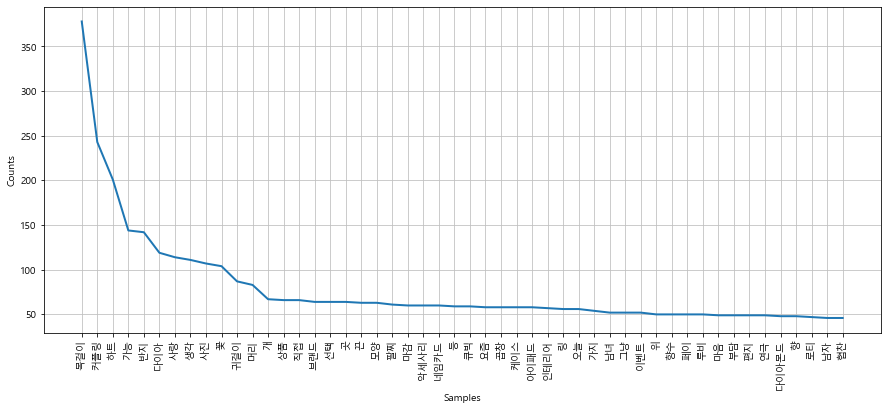

In [25]:
import nltk
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [24]:
#stop_list = ['선물','추천']
stop_words= '선물 추천 것 가격 수 여친 저 제 여자 분 요 더 사용 구매 고급 판매 때 참고 하나 해 한번 제작 용 준 디자인 거\
            네이버 사람 배송 중 정말 후기 티니 감동 세대 인기 커플 제품 여자친구'
stop_list=stop_words.split()

'''new_token_list = []
for token in tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list'''

new_tokens = [token for token in new_tokens if token not in stop_list]

- 워드 클라우드 그리기

In [26]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [32]:
data = gf_gift.vocab().most_common(100)
data[:10]

[('목걸이', 378),
 ('커플링', 243),
 ('하트', 201),
 ('가능', 144),
 ('반지', 142),
 ('다이아', 119),
 ('사랑', 114),
 ('생각', 111),
 ('사진', 107),
 ('꽃', 104)]

In [33]:
wc = WordCloud(
    font_path='c:Window/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
    ).generate_from_frequencies(dict(data))

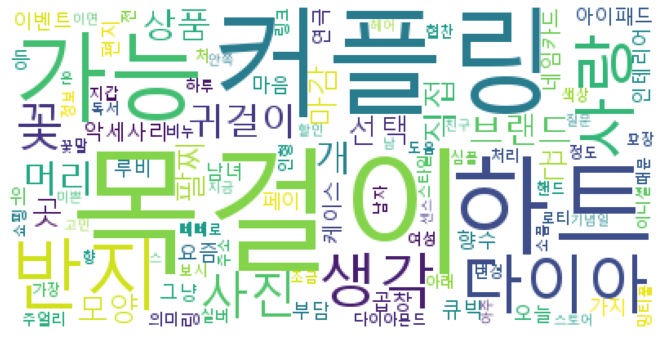

In [34]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [35]:
# 하트 그림에 표시하기
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)


In [39]:
wc = WordCloud(
    font_path='c:Window/Fonts/malgun.ttf',
    relative_scaling=0.3,mask=mask,
    background_color='white',
    min_font_size=1,max_font_size=100
    ).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

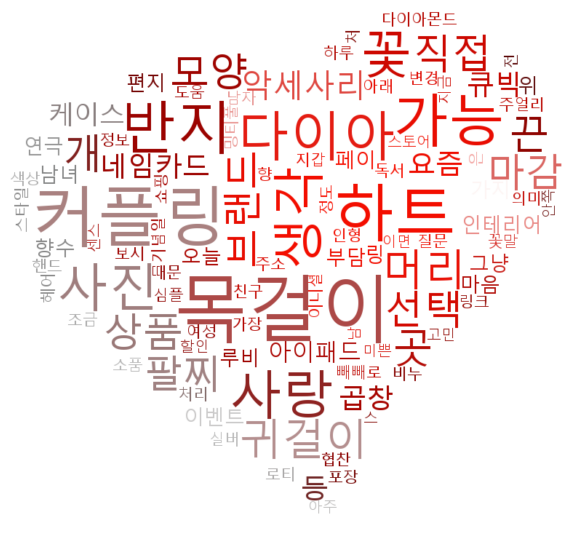

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()